In [1]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate a Gaussian 2D dataset (blobs)
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
n_samples=750, centers=centers, cluster_std=0.4, random_state=0)
X = StandardScaler().fit_transform(X)

Text(0.5, 1.0, 'Blobs with lables')

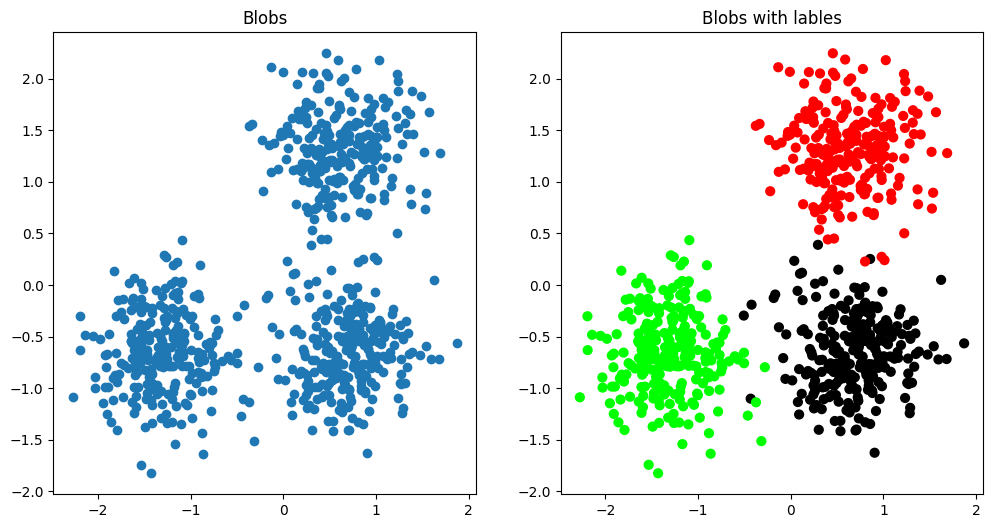

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,6))
colormap=np.array(['red','lime','black'])

# Plot the blobs without lables
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1])
plt.title('Blobs')
#plt.show()
# Plot the blobs with lables (Ground Truth (GT)). We will use it for clustering results evaluation
plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true],s=40)
plt.title('Blobs with lables')
#plt.show()

In [3]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Use K = 3
model=KMeans(n_clusters=3)
model.fit(X)
predY=np.choose(model.labels_,[0,1,2]).astype(np.int64)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


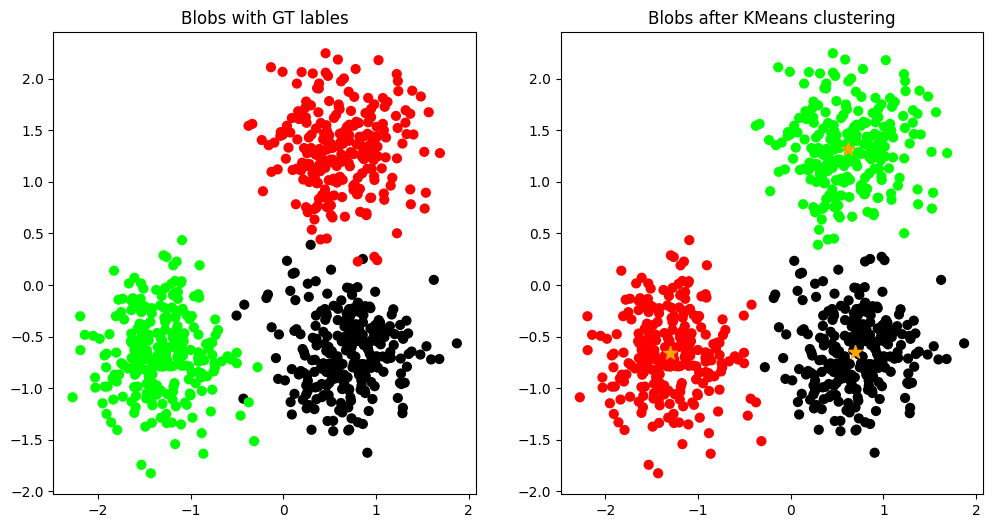

In [5]:
plt.figure(figsize=(12,6))
colormap=np.array(['red','lime','black'])
# Plot the blobs before the clustering
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true],s=40)
plt.title('Blobs with GT lables')
# Plot the blobs after KMeans clustering
plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=colormap[predY],s=40)
plt.title('Blobs after KMeans clustering')
# We will also get the coordinates of the cluster centers using KMeans.cluster_centers_ and save it as k_means_cluster_centers.
k_means_cluster_centers = model.cluster_centers_
# define the centroid, or cluster center.
cluster_centers = k_means_cluster_centers
#print(cluster_center)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='*',c='orange',s=100)

In [6]:
import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X) # Params for blobs data
# db = DBSCAN(eps=0.15, min_samples=5).fit(X) # Params for two moons data
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


Text(0.5, 1.0, 'DBSCAN estimated number of clusters: 3')

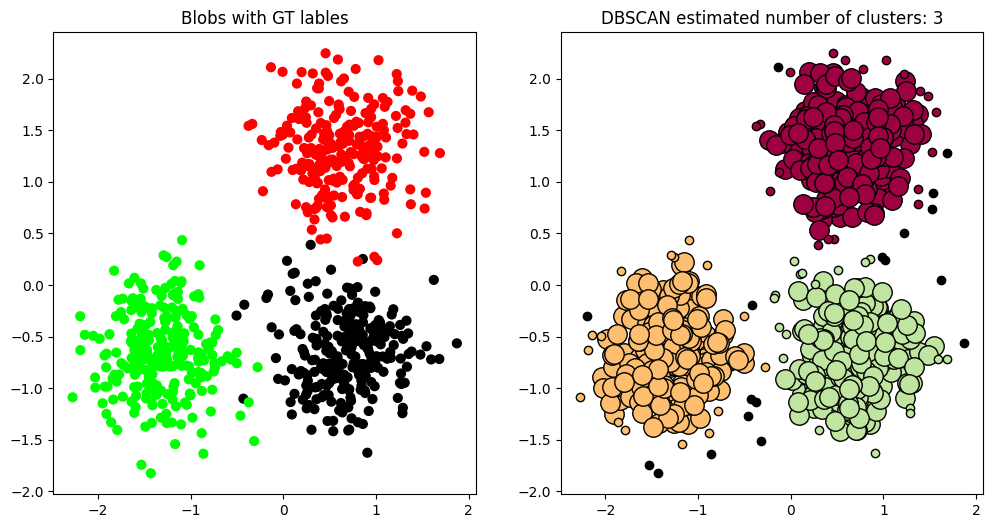

In [7]:
plt.figure(figsize=(12,6))
# Plot the blobs before the clustering

plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true],s=40)
plt.title('Blobs with GT lables')
# Plot the blobs after DBSCAN clustering. I used a different visualization/plot to show the core points and the noisy points in different color and size
plt.subplot(1,2,2)
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1,
len(unique_labels))]
for k, col in zip(unique_labels, colors):
  if k == -1:
    # Black used for noise.
    col = [0, 0, 0, 1]
  class_member_mask = labels == k
  xy = X[class_member_mask & core_samples_mask]
  plt.plot(xy[:, 0],xy[:, 1],"o",markerfacecolor=tuple(col),markeredgecolor="k",markersize=14,)
  xy = X[class_member_mask & ~core_samples_mask]
  plt.plot(xy[:, 0],xy[:, 1],"o",markerfacecolor=tuple(col),markeredgecolor="k",markersize=6,)
plt.title(f"DBSCAN estimated number of clusters: {n_clusters_}")

In [8]:
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=3)
gmm.fit(X)
y_cluster_gmm=gmm.predict(X)

Text(0.5, 1.0, 'Blobs after GMMs clustering')

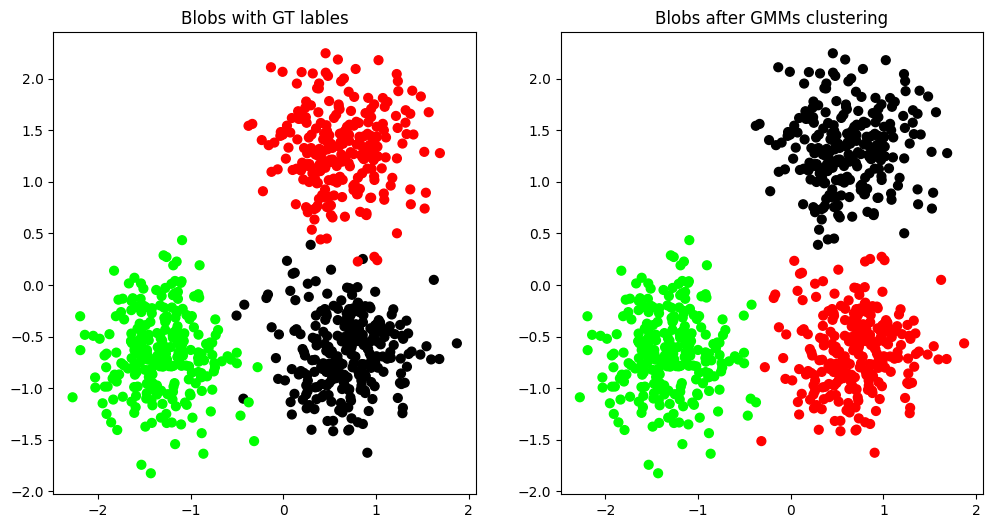

In [9]:
plt.figure(figsize=(12,6))
colormap=np.array(['red','lime','black'])
# Plot the blobs before the clustering
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true],s=40)
plt.title('Blobs with GT lables')
# Plot the blobs after KMeans clustering
plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=colormap[y_cluster_gmm],s=40)
plt.title('Blobs after GMMs clustering')

In [10]:
print(f"---------------------------")
print(f"DBSCAN Evaluation measures\n")
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true,labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true,labels):.3f}")
print(
"Adjusted Mutual Information:"
f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")
print(f"\n---------------------------")
print(f"K-Means Evaluation measures\n")
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, predY):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true,predY):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, predY):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true,predY):.3f}")
print(
"Adjusted Mutual Information:"
f" {metrics.adjusted_mutual_info_score(labels_true, predY):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, predY):.3f}")
print(f"\n---------------------------")
print(f"GMMs Evaluation measures\n")
print(f"Homogeneity: {metrics.homogeneity_score(labels_true,y_cluster_gmm):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true,y_cluster_gmm):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true,y_cluster_gmm):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true,y_cluster_gmm):.3f}")
print(
"Adjusted Mutual Information:"f" {metrics.adjusted_mutual_info_score(labels_true,y_cluster_gmm):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X,y_cluster_gmm):.3f}")

---------------------------
DBSCAN Evaluation measures

Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626

---------------------------
K-Means Evaluation measures

Homogeneity: 0.945
Completeness: 0.945
V-measure: 0.945
Adjusted Rand Index: 0.968
Adjusted Mutual Information: 0.945
Silhouette Coefficient: 0.650

---------------------------
GMMs Evaluation measures

Homogeneity: 0.939
Completeness: 0.939
V-measure: 0.939
Adjusted Rand Index: 0.964
Adjusted Mutual Information: 0.938
Silhouette Coefficient: 0.650


In [37]:
from sklearn.datasets import make_moons
X, labels_true = make_moons(n_samples=500, noise=0.1)

In [38]:
X = StandardScaler().fit_transform(X)

Text(0.5, 1.0, 'Blobs with lables')

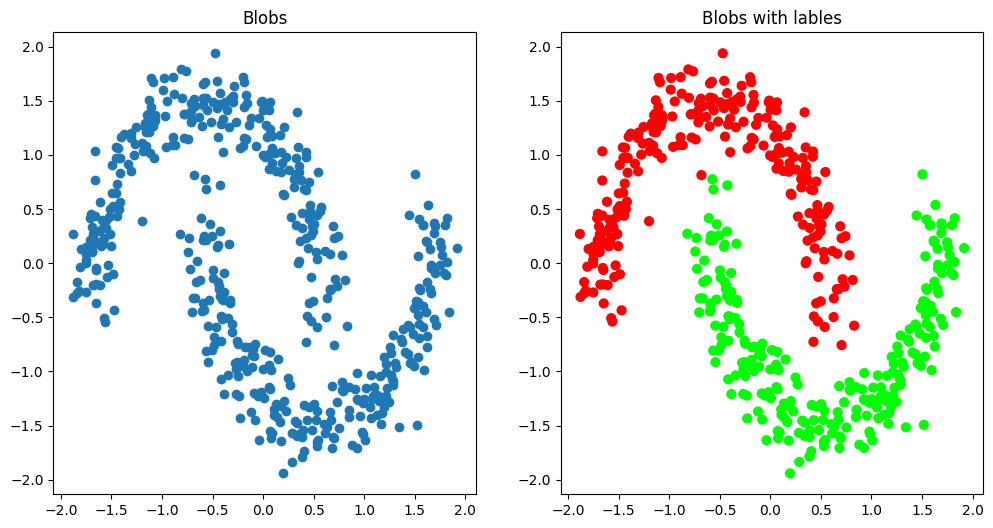

In [39]:
plt.figure(figsize=(12,6))
colormap=np.array(['red','lime','black'])

# Plot the blobs without lables
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1])
plt.title('Blobs')
#plt.show()
# Plot the blobs with lables (Ground Truth (GT)). We will use it for clustering results evaluation
plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true],s=40)
plt.title('Blobs with lables')
#plt.show()

In [14]:
# Use K = 2
model=KMeans(n_clusters=2)
model.fit(X)
predY=np.choose(model.labels_,[0,1,2]).astype(np.int64)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


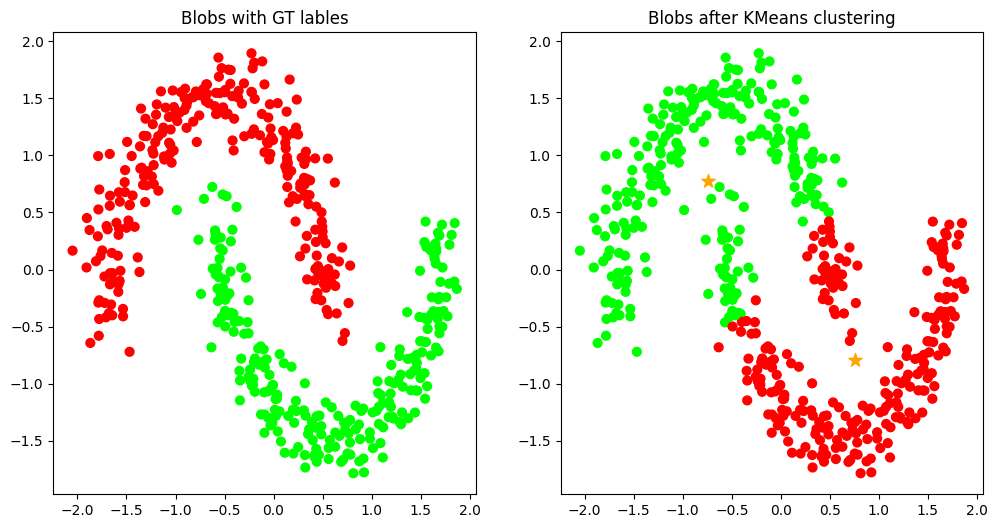

In [15]:
plt.figure(figsize=(12,6))
colormap=np.array(['red','lime','black'])
# Plot the blobs before the clustering
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true],s=40)
plt.title('Blobs with GT lables')
# Plot the blobs after KMeans clustering
plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=colormap[predY],s=40)
plt.title('Blobs after KMeans clustering')
# We will also get the coordinates of the cluster centers using KMeans.cluster_centers_ and save it as k_means_cluster_centers.
k_means_cluster_centers = model.cluster_centers_
# define the centroid, or cluster center.
cluster_centers = k_means_cluster_centers
#print(cluster_center)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='*',c='orange',s=100)

In [16]:
db = DBSCAN(eps=0.15, min_samples=5).fit(X) # Params for blobs data
# db = DBSCAN(eps=0.15, min_samples=5).fit(X) # Params for two moons data
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 5
Estimated number of noise points: 49


Text(0.5, 1.0, 'DBSCAN estimated number of clusters: 5')

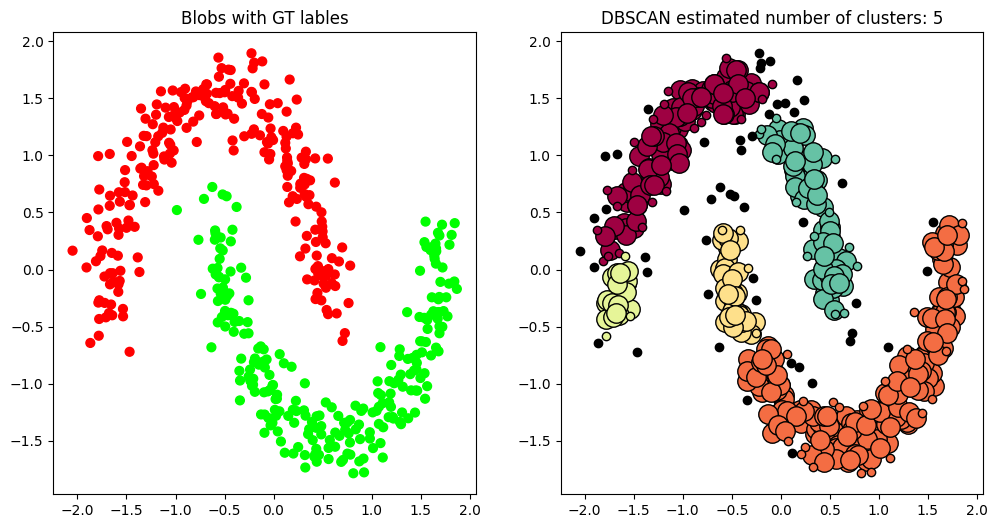

In [17]:
plt.figure(figsize=(12,6))
# Plot the blobs before the clustering

plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true],s=40)
plt.title('Blobs with GT lables')
# Plot the blobs after DBSCAN clustering. I used a different visualization/plot to show the core points and the noisy points in different color and size
plt.subplot(1,2,2)
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1,
len(unique_labels))]
for k, col in zip(unique_labels, colors):
  if k == -1:
    # Black used for noise.
    col = [0, 0, 0, 1]
  class_member_mask = labels == k
  xy = X[class_member_mask & core_samples_mask]
  plt.plot(xy[:, 0],xy[:, 1],"o",markerfacecolor=tuple(col),markeredgecolor="k",markersize=14,)
  xy = X[class_member_mask & ~core_samples_mask]
  plt.plot(xy[:, 0],xy[:, 1],"o",markerfacecolor=tuple(col),markeredgecolor="k",markersize=6,)
plt.title(f"DBSCAN estimated number of clusters: {n_clusters_}")

In [24]:
gmm=GaussianMixture(n_components=2)
gmm.fit(X)
y_cluster_gmm=gmm.predict(X)

Text(0.5, 1.0, 'Blobs after GMMs clustering')

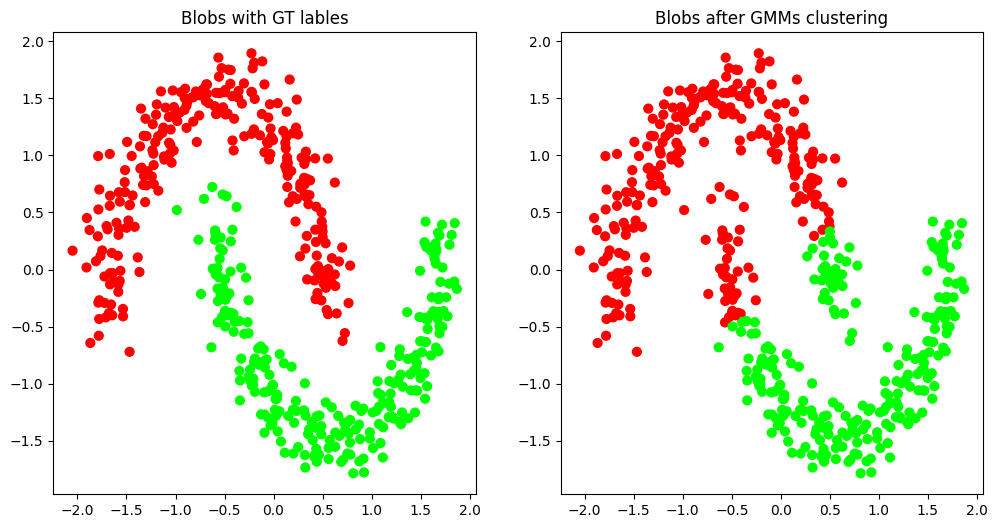

In [25]:
plt.figure(figsize=(12,6))
colormap=np.array(['red','lime','black'])
# Plot the blobs before the clustering
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true],s=40)
plt.title('Blobs with GT lables')
# Plot the blobs after KMeans clustering
plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=colormap[y_cluster_gmm],s=40)
plt.title('Blobs after GMMs clustering')

In [26]:
print(f"---------------------------")
print(f"DBSCAN Evaluation measures\n")
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true,labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true,labels):.3f}")
print(
"Adjusted Mutual Information:"
f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")
print(f"\n---------------------------")
print(f"K-Means Evaluation measures\n")
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, predY):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true,predY):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, predY):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true,predY):.3f}")
print(
"Adjusted Mutual Information:"
f" {metrics.adjusted_mutual_info_score(labels_true, predY):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, predY):.3f}")
print(f"\n---------------------------")
print(f"GMMs Evaluation measures\n")
print(f"Homogeneity: {metrics.homogeneity_score(labels_true,y_cluster_gmm):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true,y_cluster_gmm):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true,y_cluster_gmm):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true,y_cluster_gmm):.3f}")
print(
"Adjusted Mutual Information:"f" {metrics.adjusted_mutual_info_score(labels_true,y_cluster_gmm):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X,y_cluster_gmm):.3f}")

---------------------------
DBSCAN Evaluation measures

Homogeneity: 0.906
Completeness: 0.400
V-measure: 0.555
Adjusted Rand Index: 0.469
Adjusted Mutual Information: 0.553
Silhouette Coefficient: 0.290

---------------------------
K-Means Evaluation measures

Homogeneity: 0.361
Completeness: 0.361
V-measure: 0.361
Adjusted Rand Index: 0.456
Adjusted Mutual Information: 0.360
Silhouette Coefficient: 0.493

---------------------------
GMMs Evaluation measures

Homogeneity: 0.376
Completeness: 0.376
V-measure: 0.376
Adjusted Rand Index: 0.472
Adjusted Mutual Information: 0.375
Silhouette Coefficient: 0.493


In [29]:
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.0 MB/s eta 0:00:00


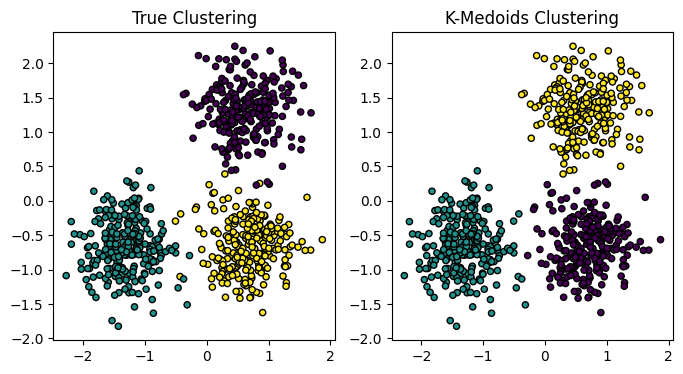

Accuracy: 0.3373333333333333


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import accuracy_score

# Generate a Gaussian 2D dataset (blobs)
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
n_samples=750, centers=centers, cluster_std=0.4, random_state=0)
X = StandardScaler().fit_transform(X)

# Apply K-Medoids
k = 3  # Number of clusters
kmedoids = KMedoids(n_clusters=k, random_state=0)
kmedoids.fit(X)
labels_pred = kmedoids.labels_

# Plotting
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels_true, cmap='viridis', s=20, edgecolors='k')
plt.title('True Clustering')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels_pred, cmap='viridis', s=20, edgecolors='k')
plt.title('K-Medoids Clustering')

plt.show()

# Assessing accuracy (assuming labels are known)
accuracy = accuracy_score(labels_true, labels_pred)
print("Accuracy:", accuracy)


In [32]:
from sklearn import metrics

# K-Medoids Evaluation measures
print(f"---------------------------")
print(f"K-Medoids Evaluation measures\n")
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels_pred):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels_pred):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels_pred):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels_pred):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(labels_true, labels_pred):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels_pred):.3f}")
print(f"\n---------------------------")

---------------------------
K-Medoids Evaluation measures

Homogeneity: 0.945
Completeness: 0.945
V-measure: 0.945
Adjusted Rand Index: 0.968
Adjusted Mutual Information: 0.945
Silhouette Coefficient: 0.650

---------------------------


K-Means Evaluation measures

Homogeneity: 0.945

Completeness: 0.945

V-measure: 0.945

Adjusted Rand Index: 0.968

Adjusted Mutual Information: 0.945

Silhouette Coefficient: 0.650


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


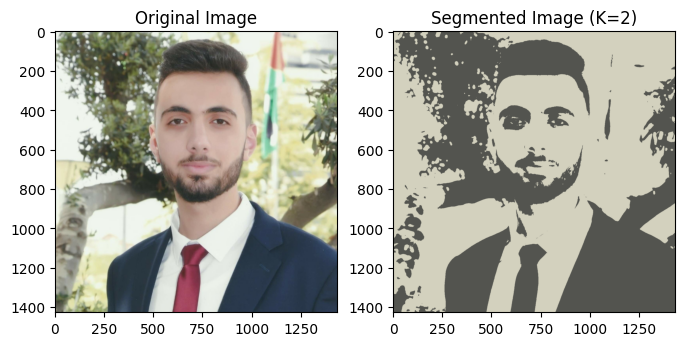

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


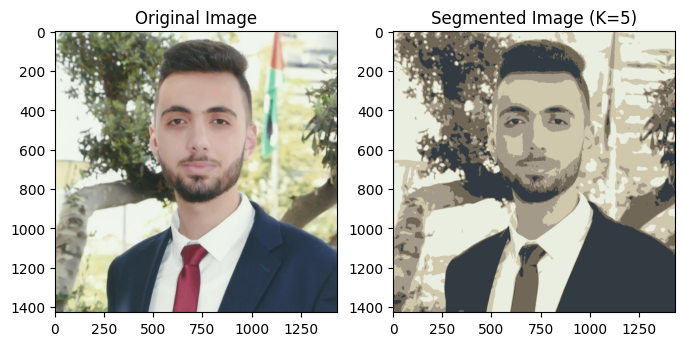

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


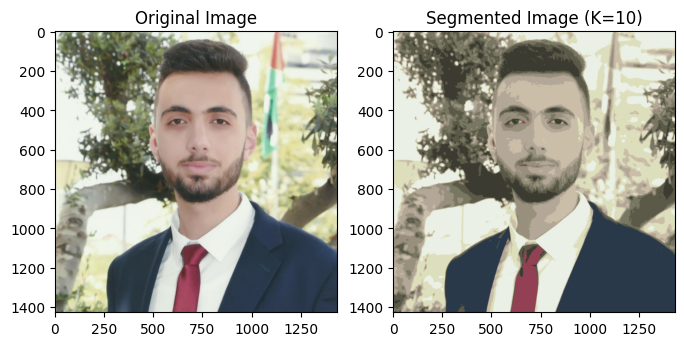

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


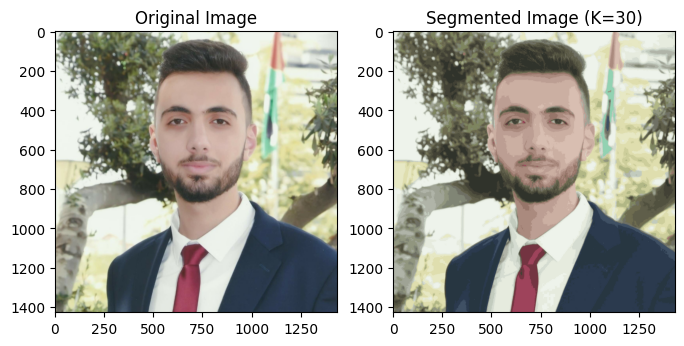

In [34]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def kmeans_segmentation(image_path, k_values):
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Reshape the image to a 2D array of pixels
    pixels = image.reshape((-1, 3))

    # Iterate over different values of K
    for k in k_values:
        # Apply K-means clustering
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(pixels)
        segmented_image = kmeans.cluster_centers_[kmeans.labels_].reshape(image.shape)

        # Display the segmented image
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.title('Original Image')

        plt.subplot(1, 2, 2)
        plt.imshow(segmented_image.astype(np.uint8))
        plt.title(f'Segmented Image (K={k})')

        plt.show()

if __name__ == "__main__":
    # Specify the path to your input image
    input_image_path = "me.jpg"

    # Specify the values of K for segmentation
    k_values = [2, 5, 10, 30]

    # Perform K-means segmentation
    kmeans_segmentation(input_image_path, k_values)
